In [32]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [33]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
X=df.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


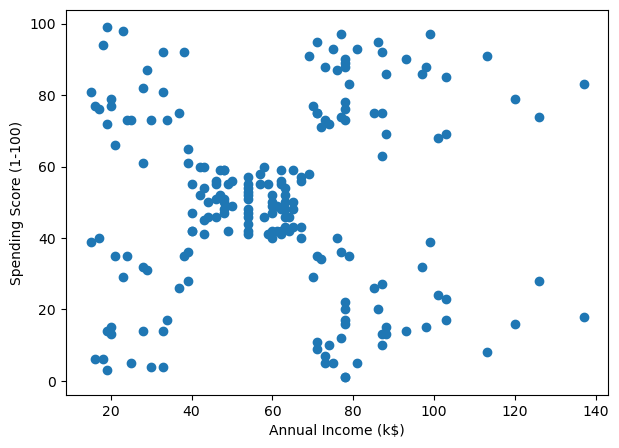

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [36]:
scaler=StandardScaler()
X_s=scaler.fit_transform(X)

In [37]:
dbscan=DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(X_s)

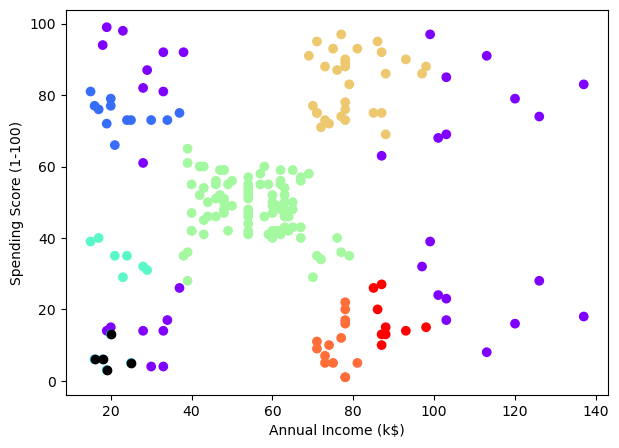

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=clusters,cmap='rainbow')
plt.scatter(X.iloc[clusters==1]['Annual Income (k$)'],X.iloc[clusters==1]['Spending Score (1-100)'],color='black',label='Noise')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [39]:
from sklearn.metrics import silhouette_score
silhouette_score(X,clusters)

np.float64(0.31595469080938154)

In [43]:
eps_value=[0.2,0.3,0.5]

for eps in eps_value:
    print(f"\nEvaluating DBScan using eps={eps}")    
    dbscan=DBSCAN(eps=eps,min_samples=5)
    labels=dbscan.fit_predict(X_s)
    unique_labels=set(labels)
    n_clusters=len(unique_labels)-(1 if -1 in unique_labels else 0)

    n_noise=list(labels).count(-1)
    noise_ratio=n_noise/len(labels)
    print(f"Number of clusters: {n_clusters}")
    print(f"Number of noise points: {noise_ratio:.2f}")

    if n_clusters > 1:
        mask = labels != -1
        labels_non_noise = labels[mask]
        X_non_noise = X_s[mask]
        if len(set(labels_non_noise)) > 1:
            silhouette_avg = silhouette_score(X_non_noise, labels_non_noise)
            print(f"Silhouette Score (excluding noise): {silhouette_avg:.2f}")
        else:
            print("Silhouette Score: Not applicable")


Evaluating DBScan using eps=0.2
Number of clusters: 7
Number of noise points: 0.39
Silhouette Score (excluding noise): 0.59

Evaluating DBScan using eps=0.3
Number of clusters: 7
Number of noise points: 0.17
Silhouette Score (excluding noise): 0.52

Evaluating DBScan using eps=0.5
Number of clusters: 2
Number of noise points: 0.04
Silhouette Score (excluding noise): 0.39
